# Machine learning exercise 7-8

1. Machine learning algorithms performance metrics
    - Binary classification performance metrics
        - True Positives, True Negatives, False Positives, False Negatives 
        - Accuracy, Sensitivity, Specificity 
        - ROC & AUC
    - Other metrics
2. Overfitting and Cross-Validation
3. Improve performance and select a model: example

In [3]:
import pandas as pd
import numpy as np
import math

path = "../Data/"
marketingDf = pd.read_csv(path + "Success_of_bank_telemarketing.csv")
marketingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30477 entries, 0 to 30476
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30477 non-null  int64 
 1   Job             30477 non-null  object
 2   Marital_Status  30477 non-null  object
 3   Education       30477 non-null  object
 4   Default_Credit  30477 non-null  object
 5   Housing_Loan    30477 non-null  object
 6   Personal_Loan   30477 non-null  object
 7   Subscribed      30477 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


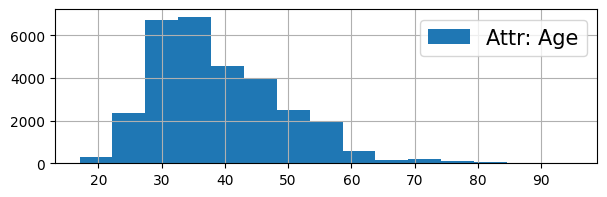

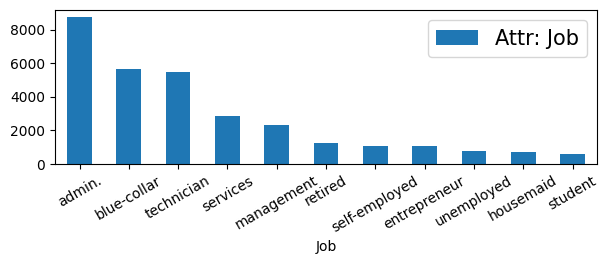

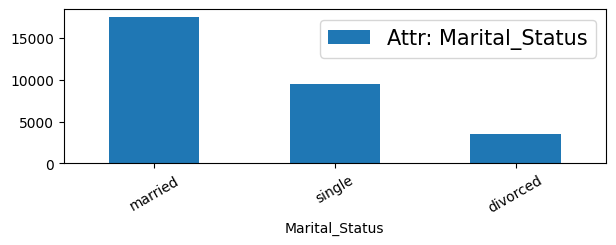

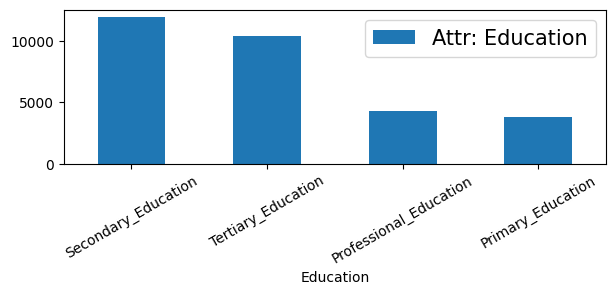

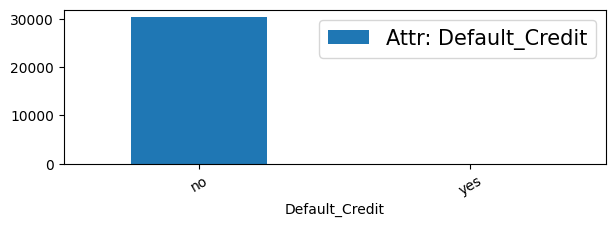

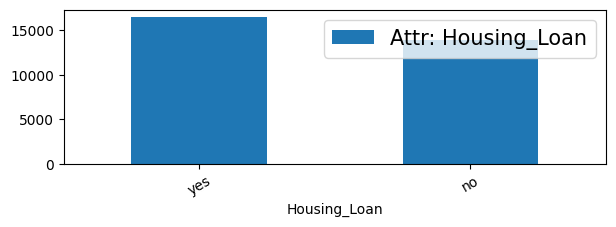

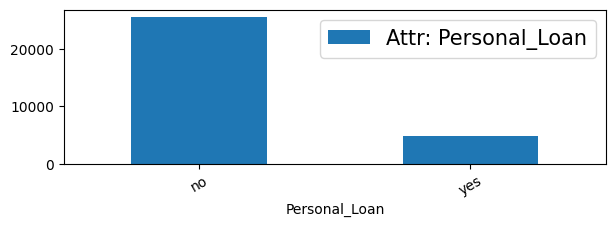

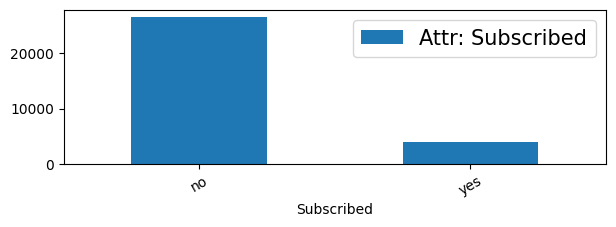

In [7]:
import matplotlib.pyplot as plt

num_columns = ['Age'] # Set of numerical columns: use a different plot type 

i=0
for column in marketingDf:
    s = marketingDf[column]        
    fig, ax = plt.subplots(figsize=(7, 2))
    
    if column in num_columns:
        ax = s.hist(bins=15)
    else:
        ax = s.value_counts().plot(kind='bar', rot=30)
    ax.legend(['Attr: ' + column], fontsize=15)

plt.show()

Class data util from previous notebooks

In [8]:
class Data:
    """ A util class to store the training and test datasets. """
    verbose = False
    
    def __init__(self, tr_explanatory: pd.DataFrame, tr_explained: pd.DataFrame, 
                test_explanatory: pd.DataFrame, test_explained: pd.DataFrame):
        
        self.tr_explanatory = tr_explanatory
        self.tr_explained = tr_explained
        self.test_explanatory = test_explanatory
        self.test_explained = test_explained
    
    def consistency_check(self):
        if self.verbose:
            print("Shape EXPLANATORY (Training set): {}".format(self.tr_explanatory.shape))
            print("Shape EXPLAINED (Training set): {}".format(self.tr_explained.shape))
            print("Shape EXPLANATORY (Test set): {}".format(self.test_explanatory.shape))
            print("Shape EXPLAINED (Test set): {}".format(self.test_explained.shape))
        
        if self.tr_explanatory.shape[0] == self.tr_explained.shape[0] and \
            self.test_explanatory.shape[0] == self.test_explained.shape[0] and \
            self.tr_explanatory.shape[1] == self.test_explanatory.shape[1] :
            print("Consistent dimensions.")
            return True
        else:
            print("ERROR: Inconsistent dimensions!")
            print(self.tr_explanatory.shape[0] == self.tr_explained.shape[0])
            print(self.test_explanatory.shape[0] == self.test_explained.shape[0])
            print(self.tr_explanatory.shape[1] == self.test_explanatory.shape[1])
            return False 
        

Need of LabelEncoder, because many classifiers do not work with categorical data/strings

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

marketingDf = marketingDf.apply(le.fit_transform)
marketingDf.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,39,3,1,0,0,0,0,0
1,20,7,1,2,0,1,0,0
2,23,0,1,0,0,0,0,0
3,39,7,1,2,0,0,1,0
4,42,0,1,1,0,0,0,0


#### Split the data
- training set - used for fitting/training the classifier
- test set - used for validating the fitted classifier

In [12]:
marketingDf = marketingDf.sample(frac=1).reset_index(drop=True)
n = marketingDf.shape[0]
thr = math.floor(0.9 * n)

# Training subset
X = marketingDf.iloc[0:thr:, :-1]  # Explanatory variables
Y = marketingDf.iloc[0:thr:, -1]   # Target variable (the Class) 

# Testing subset
X_test = marketingDf.iloc[thr:n:, :-1]  # Explanatory variables
Y_test = marketingDf.iloc[thr:n:, -1]   # Target variable (the Class) 

marketing = Data(X, Y, X_test, Y_test)

print("Threshold: " + str(thr))
marketing.consistency_check() 

Threshold: 27429
Consistent dimensions.


True

# 1. ML performance metrics
* Binary classifaction metrics
    - True positives (TP), True negatives (TN), False positives (FP), False negatives (FN)
    - Accuracy, Sensitivity, Specificity
    - ROC & AUC
* Multi-class metrics
    - Confusion matrix
* Regression metrics
    - Mean squared Error & RMSE

## Binary classification metrics
* Two possible classes: true/false; 1/0; yes/no
* Given the explanatory variables predict which class belongs to the target variable
* Compare actual vs predicted for a large number of instances (test set)

### True Positives, True Negatives, False Positives, False Negatives

Let us denote: 
* TP = True Positives: <i>Correct true prediction (predicted = actual = true)</i>
* TN = True Negatives: <i>Correct false prediction (predicted = actual = false)</i>
* FP = False Positives: <i>Predict an event when there was no event (predicted = True; actual = False)</i>
* FN = False Negatives: <i>Predict no event when in fact there was an event (predicted = False; actual = True)</i>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
# minkovski distance by default
# p =2 -> euclidean
kNNr = KNeighborsClassifier(n_neighbors=k)

kNNr.fit(marketing.tr_explanatory, marketing.tr_explained)

predictions = kNNr.predict(marketing.test_explanatory)

print("Value \"1\" corresponds to class " + str(le.inverse_transform([1])))
print("Value \"0\" corresponds to class " + str(le.inverse_transform([0])))
print("\n") 

predictions_labels = le.inverse_transform(predictions)
print("Predictions (first 100): \n {0} \n\n\n".format(predictions_labels[0:100]))

# Predicted vs. Actual 
pred_vs_actual_df = marketing.test_explanatory.copy()
pred_vs_actual_df["ClassPredicted"] = predictions

actual = marketing.test_explained  # Get 'explained' from the Test Set 
pred_vs_actual_df["ClassActual"] = actual


Value "1" corresponds to class ['yes']
Value "0" corresponds to class ['no']


Predictions (first 100): 
 ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'yes'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no'] 





Use the functionalities of Pandas to identify the indexes of {Predicted == Actual} and {Predicted <> Actual}

In [19]:
# Correct predictions (indexes)
correct_predictions_ind = (pred_vs_actual_df['ClassPredicted'] == pred_vs_actual_df['ClassActual'])
print("Indexes correct: \n {}".format(correct_predictions_ind))

# Wrong predictions (indexes): Predicted class and Actual class are DIFFERENT
wrong_predictions_ind = (pred_vs_actual_df['ClassPredicted'] != pred_vs_actual_df['ClassActual'])
print("\n\nIndexes incorrect: \n {}".format(wrong_predictions_ind))

Indexes correct: 
 27429    True
27430    True
27431    True
27432    True
27433    True
         ... 
30472    True
30473    True
30474    True
30475    True
30476    True
Length: 3048, dtype: bool


Indexes incorrect: 
 27429    False
27430    False
27431    False
27432    False
27433    False
         ...  
30472    False
30473    False
30474    False
30475    False
30476    False
Length: 3048, dtype: bool


TP, NP, FP, FN

In [22]:
TP = pred_vs_actual_df.loc[correct_predictions_ind & (pred_vs_actual_df['ClassPredicted'] ==  1)]
TN = pred_vs_actual_df.loc[correct_predictions_ind & (pred_vs_actual_df['ClassPredicted'] ==  0)]

FP = pred_vs_actual_df.loc[wrong_predictions_ind & (pred_vs_actual_df['ClassPredicted'] ==  1)]
FN = pred_vs_actual_df.loc[wrong_predictions_ind & (pred_vs_actual_df['ClassPredicted'] ==  0)]

print("TPs:\n")
print(TP.head(5))
print("----------------------------------------------------------------------------------------------")

print("TNs:\n")
print(TN.head(5))
print("----------------------------------------------------------------------------------------------")

print("FPs:\n")
print(FP.head(5))
print("----------------------------------------------------------------------------------------------")

print("FNs:\n")
print(FN.head(5))

TPs:

       Age  Job  Marital_Status  Education  Default_Credit  Housing_Loan  \
27501   36    0               0          3               0             0   
27546   18    9               0          0               0             1   
27603    6    8               2          2               0             0   
27671   29   10               1          2               0             0   
27676   19    7               1          2               0             1   

       Personal_Loan  ClassPredicted  ClassActual  
27501              0               1            1  
27546              0               1            1  
27603              0               1            1  
27671              0               1            1  
27676              1               1            1  
----------------------------------------------------------------------------------------------
TNs:

       Age  Job  Marital_Status  Education  Default_Credit  Housing_Loan  \
27429   17    1               1          2      

In [29]:
TP_count = TP.shape[0]
TN_count = TN.shape[0]
FP_count = FP.shape[0]
FN_count = FN.shape[0] 

print("TP: {0} \nTN: {1} \n\nFP: {2} \nFN: {3}".format(TP_count, TN_count, FP_count, FN_count))

print("\nSum TP+TN: {0}; Sum FP+FN: {1} ".format(TP_count + TN_count, FP_count + FN_count))

print("\nSum all (sample size): {} ".format(TP_count + TN_count + FP_count + FN_count))
print("Check: Number of instances in the testing set: {} ".format(marketing.test_explained.shape[0]))

TP: 66 
TN: 2344 

FP: 342 
FN: 296

Sum TP+TN: 2410; Sum FP+FN: 638 

Sum all (sample size): 3048 
Check: Number of instances in the testing set: 3048 


In [25]:
pd.crosstab(actual, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2344,342,2686
1,296,66,362
All,2640,408,3048


### Accuracy, Sensitivity, Specificity
* TP = True Positives: <i>Correct true prediction (predicted = actual)</i>
* TN = True Negatives: <i>Correct false prediction (predicted = actual)</i>
* FP = False Positives: <i>Predict an event when there was no event (predicted = True; actual = False)</i>
* FN = False Negatives: <i>Predict no event when in fact there was an event (predicted = False; actual = True)</i>
<br><br><br>
* Accuracy:  $\displaystyle ACC = \frac{TP + TN}{Sample.size} = \frac{TP + TN}{TP + TN + FP + FN}$
<br><br><br>
* True Positive Rate (Sensitivity): $\displaystyle TPR = \frac{TP}{TP + FN}$
* Specificity: $\displaystyle SPEC = \frac{TN}{TN + FP}$
* False Positive Rate: $\displaystyle FPR = \frac{FP}{TN + FP} = 1 - SPEC$

In [31]:
ACC = (TP_count + TN_count) / (TP_count + TN_count + FP_count + FN_count)

TPR = TP_count / (TP_count + FN_count) 

SPEC = TN_count / (TN_count + FP_count) 

FPR = FP_count / (TN_count + FP_count) 

print("Accuracy = {:.2f} % \n".format(ACC*100))

print("Sensitivity (TPR) = {:.4f}".format(TPR))
print("FPR = {:.4f}".format(FPR))
print("1-SPEC = {:.4f}".format((1-SPEC)))

print("\nPrecision i.e. Positive Predictive Value (PPV) = {:.4f}".format(TP_count/(TP_count+FP_count)))
print("\nBalanced Accuracy (BA) = {:.4f}".format((TPR+SPEC)/2))

Accuracy = 79.07 % 

Sensitivity (TPR) = 0.1823
FPR = 0.1273
1-SPEC = 0.1273

Precision i.e. Positive Predictive Value (PPV) = 0.1618

Balanced Accuracy (BA) = 0.5275


Why calculate by hand when there is a function for that

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(marketing.test_explained, predictions)
print("Confusion matrix: \n{}".format(conf_matrix))

# Get only the Accuracy; represent the report as a dictionary (output_dict=True)
ACC = classification_report(marketing.test_explained, predictions, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(marketing.test_explained, predictions, output_dict=False))

Confusion matrix: 
[[2344  342]
 [ 296   66]]

#####   Accuracy: 79.06824146981627 %   ##### 



              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2686
           1       0.16      0.18      0.17       362

    accuracy                           0.79      3048
   macro avg       0.52      0.53      0.53      3048
weighted avg       0.80      0.79      0.80      3048



###  Receiver operating characteristing (ROC curve) and Area under the curve (AUC)
Plot the true positive rate (TPR) against the false positive rate (FPR) on the x-axis for different treshold values.
<br>
<b>Evaluate performance:</b> The calculated TPR and FPR allow us to plot the Receiver operating characteristic curve<br>
<i>* just one point in this example</i>

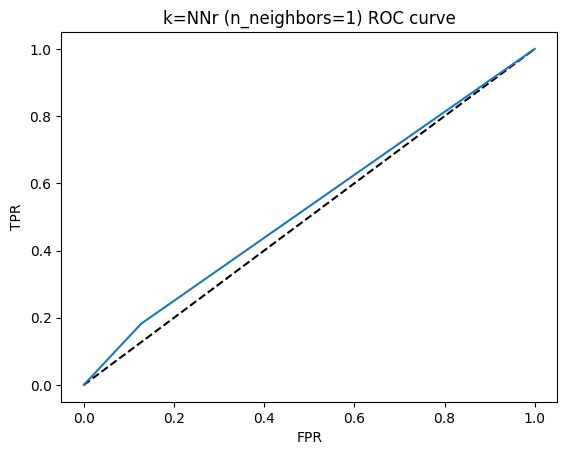

In [33]:
plt.plot([0,1],[0,1], 'k--')

plt.plot([0.0, FPR, 1.0], [0.0, TPR, 1.0], label = 'KNN')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('k=NNr (n_neighbors=1) ROC curve')
plt.show()

Again, why compute by hand when there is a function for that

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


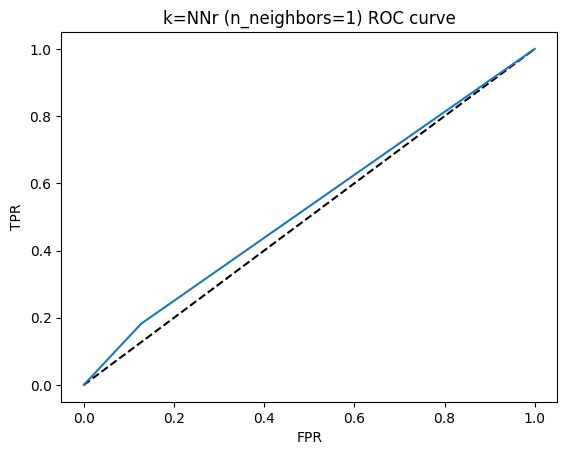

AUC = 0.52750


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Reuse the existing (trained) k-NNr instance
# Invoke the method predict_proba, used to predict Class probabilities for X
# these scores are in fact pseudo-probabilities in the case of k-NNr
y_pred_proba = kNNr.predict_proba(marketing.test_explanatory)

# Probabilities: Proba(Class 1) + Proba(Class 2) = 1 
# in y_pred_proba, the row sums [i, 0] + [i, 1] = 1
y_pred_proba = y_pred_proba[:, 1] 
print(y_pred_proba[1:25])

fpr, tpr, thresholds = roc_curve(actual, y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Knn')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('k=NNr (n_neighbors=1) ROC curve')
plt.show()

auc_score = roc_auc_score(actual, y_pred_proba)
print("AUC = {:.5f}".format(auc_score))

Now for different values of K and different classifiers

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_classifier(classifier, X_training, Y_training, X_test, Y_test):
    """ Run a classification algorithm 
        and evaluate its performance.
        
        "X" denotes the EXPLANATORY variables
        "Y" denotes the EXPLAINED variable
    """

    #Fit
    classifier.fit(X_training, Y_training)
    
    #Predict
    predicted = classifier.predict(X_test)
    
    #Predict propabilities
    probabilities = classifier.predict_proba(X_test)
    probabilities = probabilities[:,1]

    fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
    auc = roc_auc_score(Y_test, probabilities)
    conf_matrix = confusion_matrix(Y_test, predicted)
    
    # Classification report/Accuracy
    ACC = classification_report(Y_test, predicted, output_dict=True)['accuracy']
    cl_report = classification_report(Y_test, predicted, output_dict=False)
    
    print("\n#####   Accuracy: {:.5f} %   ##### ".format(ACC*100))
    print("#####   AUC = {:.5f}          ##### \n\n".format(auc))
    print("Confusion matrix: \n{}".format(conf_matrix))

    # Print all stats
    print(cl_report)

    # ROC plot
    fig = plt.figure()
    fg, ax1 = plt.subplots(1, 1, figsize=(10, 10)) 
    ax1.set_xlim([-0.05, 1.05])
    ax1.set_ylim([-0.05, 1.05])
    ax1.plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    ax1.title.set_text("ROC " + str(type(classifier)))
    ax1.plot(fpr, tpr, marker = "", alpha = 0.8)
    plt.show()


#####   Accuracy: 85.49869 %   ##### 
#####   AUC = 0.55636          ##### 


Confusion matrix: 
[[2562  124]
 [ 318   44]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2686
           1       0.26      0.12      0.17       362

    accuracy                           0.85      3048
   macro avg       0.58      0.54      0.54      3048
weighted avg       0.82      0.85      0.83      3048



<Figure size 640x480 with 0 Axes>

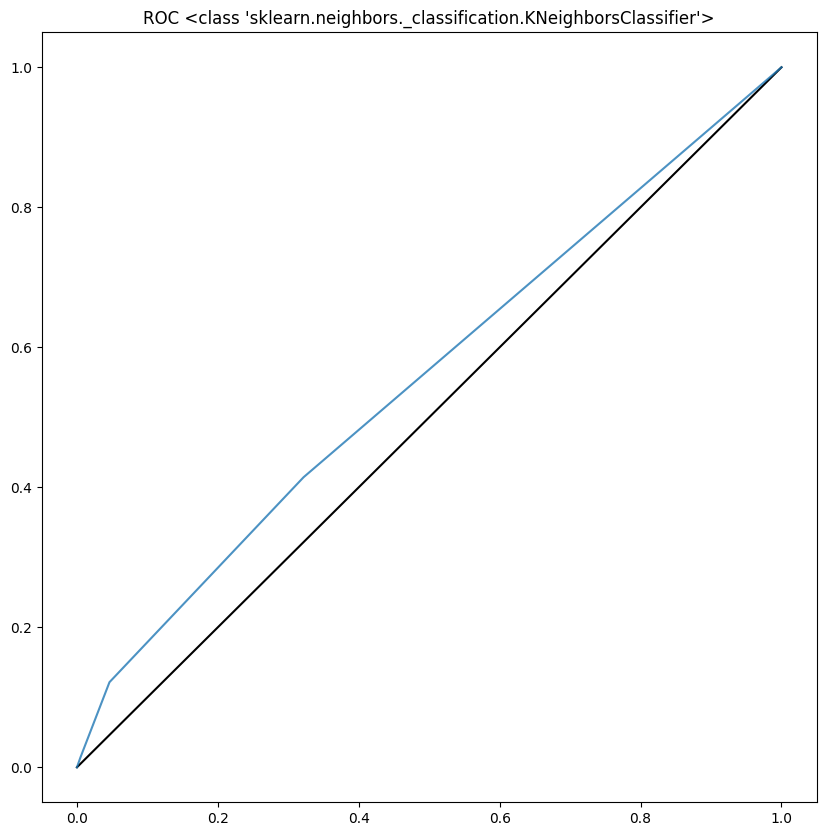

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

kNNr = KNeighborsClassifier(n_neighbors=3)

evaluate_classifier(kNNr, 
                    marketing.tr_explanatory, 
                    marketing.tr_explained, 
                    marketing.test_explanatory, 
                    marketing.test_explained)


#####   Accuracy: 86.87664 %   ##### 
#####   AUC = 0.58798          ##### 


Confusion matrix: 
[[2616   70]
 [ 330   32]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2686
           1       0.31      0.09      0.14       362

    accuracy                           0.87      3048
   macro avg       0.60      0.53      0.53      3048
weighted avg       0.82      0.87      0.84      3048



<Figure size 640x480 with 0 Axes>

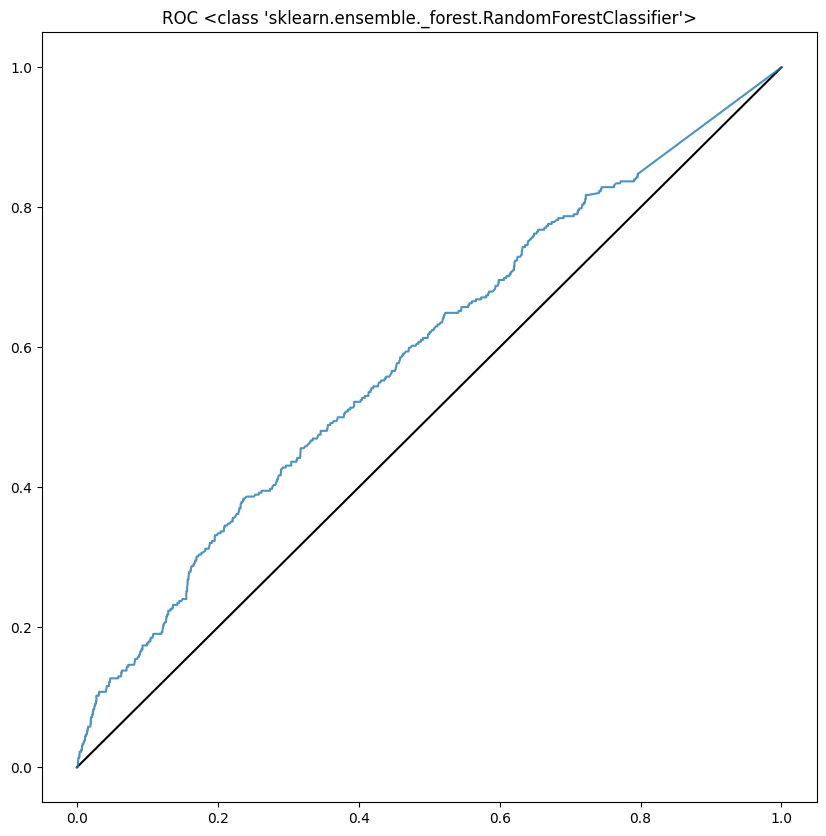

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

cla = tree.DecisionTreeClassifier()
cla = RandomForestClassifier(n_estimators=150)

####################################################
evaluate_classifier(cla, 
                    marketing.tr_explanatory, 
                    marketing.tr_explained, 
                    marketing.test_explanatory, 
                    marketing.test_explained)
####################################################


#####   Accuracy: 87.89370 %   ##### 
#####   AUC = 0.56842          ##### 


Confusion matrix: 
[[2674   12]
 [ 357    5]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2686
           1       0.29      0.01      0.03       362

    accuracy                           0.88      3048
   macro avg       0.59      0.50      0.48      3048
weighted avg       0.81      0.88      0.83      3048



<Figure size 640x480 with 0 Axes>

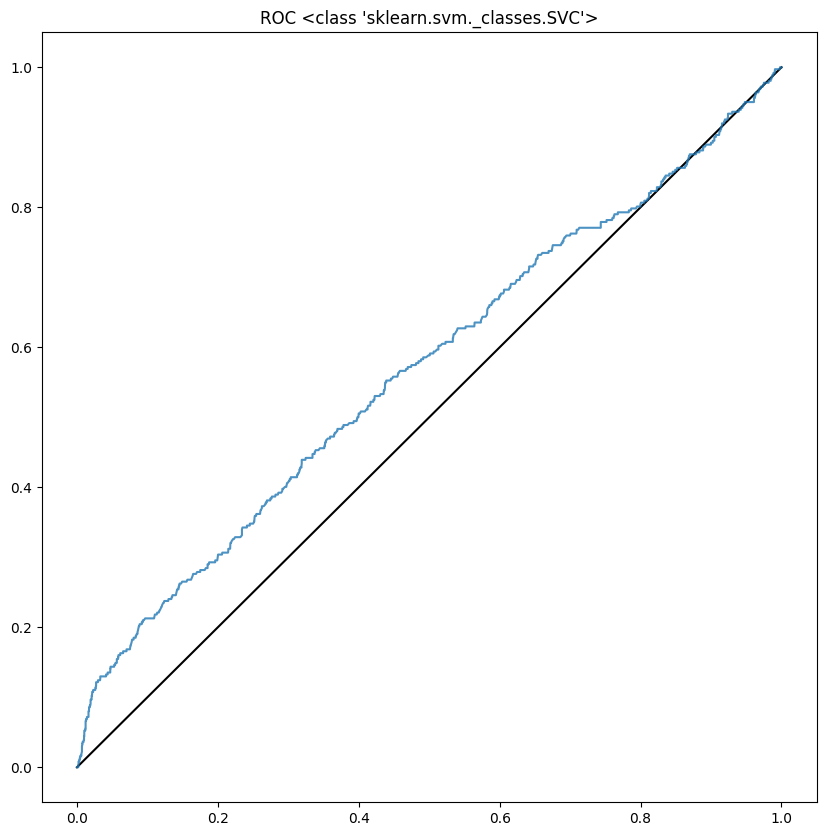

In [45]:
from sklearn import svm

cla = svm.SVC(probability=True, gamma='auto')

####################################################
evaluate_classifier(cla, 
                    marketing.tr_explanatory, 
                    marketing.tr_explained, 
                    marketing.test_explanatory, 
                    marketing.test_explained)
####################################################

# 2. Overfitting and Cross-Validation
* What is Overfitting
* k-Fold Cross-Validation

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



def evaluate_classifier(classifier, X_training, Y_training, X_test, Y_test):
    """ Run a classification algorithm 
        and evaluate its performance.
        
        "X" denotes the EXPLANATORY variables
        "Y" denotes the EXPLAINED variable
    """
    
    ### Predict the instances of the test set
    # Fit the model 
    classifier.fit(X_training, Y_training)

    # Predict new data instances
    predicted = classifier.predict(X_test)
    
    # Evaluate performance: use 'predict_proba', which works like 'predict', but returns 
    # more data, in particular the estimated probabilities for each class
    probabilities = classifier.predict_proba(X_test)
    probabilities = probabilities[:, 1] 
    
    fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
    auc = roc_auc_score(Y_test, probabilities)
    
    
    # Classification report / Accuracy
    conf_matrix = confusion_matrix(Y_test, predicted) 
    
    # Get the Accuracy
    ACC = classification_report(Y_test, predicted, output_dict=True)['accuracy']
    cl_report = classification_report(Y_test, predicted, output_dict=False)

    
    return {"ACC": ACC, "AUC": auc, "TPR": tpr, "FPR": fpr, "thresholds":thresholds, 
           "ConfusionMatrix":conf_matrix, "ClassificationReport":cl_report}

<Figure size 640x480 with 0 Axes>

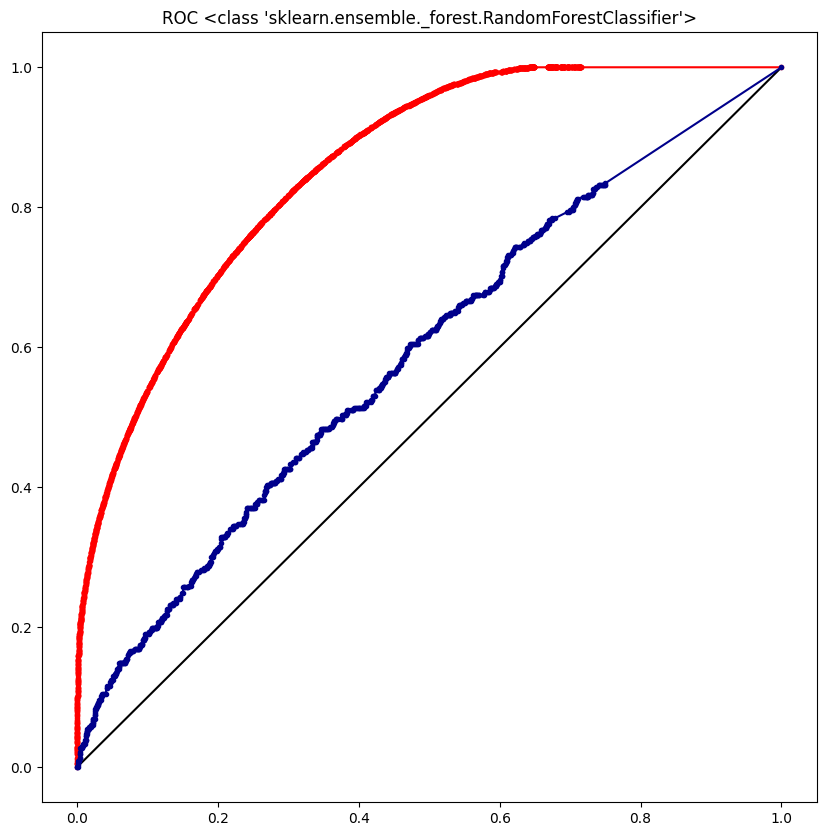


#####   Accuracy Tr Set: 89.51110 % 	 Accuracy Test Set: 86.81102 % 		 ratio: 0.9698
#####   AUC Tr Set: = 0.85590 	 AUC Test Set: = 0.59012


Confusion matrix (Tr Set): 
[[23759   176]
 [ 2701   793]]
Confusion matrix (Test Set): 
[[2616   70]
 [ 332   30]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clf = RandomForestClassifier(n_estimators=50)

####################################################
results_tr_tr = evaluate_classifier(clf, 
                                    marketing.tr_explanatory, 
                                    marketing.tr_explained, 
                                    marketing.tr_explanatory, 
                                    marketing.tr_explained)

results_tr_test = evaluate_classifier(clf, 
                                        marketing.tr_explanatory, 
                                        marketing.tr_explained, 
                                        marketing.test_explanatory, 
                                        marketing.test_explained)


# ROC plot
fig = plt.figure()
fg, ax = plt.subplots(1, 1, figsize=(10, 10)) 

ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.plot([0, 1], [0, 1], linestyle = "-", color = 'k')
ax.title.set_text("ROC " + str(type(clf)))

ax.plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = ".", color="red")
ax.plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = ".", color="darkblue")

plt.show()


print("\n#####   Accuracy Tr Set: {:.5f} % \t Accuracy Test Set: {:.5f} % \t\t ratio: {:.4f}"
      .format(results_tr_tr["ACC"]*100, results_tr_test["ACC"]*100, results_tr_test["ACC"]/results_tr_tr["ACC"]))

print("#####   AUC Tr Set: = {:.5f} \t AUC Test Set: = {:.5f}\n\n"
      .format(results_tr_tr["AUC"], results_tr_test["AUC"]))

print("Confusion matrix (Tr Set): \n{}".format(results_tr_tr["ConfusionMatrix"]))
print("Confusion matrix (Test Set): \n{}".format(results_tr_test["ConfusionMatrix"]))

## k-Fold cross validation
Split the dataset into k approx equal size subsets

In [51]:
import numpy as np
import math 

k_folds = 10
def split_df(dataframe, k_folds = 10):
    """ 
    Returns a dictionary of the split datasets. 
    """
    ret = {}
    
    #N = len(np.array(dataframe.index))
    N = dataframe.shape[0]  # row count
    len_segment = math.floor(N/k_folds)
    
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
        
    for i in range(0, k_folds):
        ind_from = i*len_segment
        ind_to = (i+1)*len_segment - 1

        if i == (k_folds-1):
            ind_to = N - 1
                
        training_1 = dataframe[0:ind_from]
        test_set = dataframe[ind_from:ind_to]
        training_2  = dataframe[ind_to:(N-1)]
        
        training_set = pd.concat([training_1, training_2])
        
        # Training subset
        X = training_set.iloc[:, :-1]  # Explanatory variables
        Y = training_set.iloc[:, -1]   # Target variable (the Class) 

        # Testing subset
        X_test = test_set.iloc[:, :-1]  # Explanatory variables
        Y_test = test_set.iloc[::, -1]  # Target variable (the Class) 
        
        # #############################
        # Create a Data object 
        data_obj_i = Data(X, Y, X_test, Y_test)
        data_obj_i.consistency_check()  # call the 'Consistency check' method od the class 'Data'
        # #############################
        
        ret[i] = data_obj_i
    
    # return a dictionary
    return ret

In [53]:
data_k_folds = split_df(marketingDf, 10)
print(type(data_k_folds[0].tr_explanatory.iloc[1]))

Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
<class 'pandas.core.series.Series'>


Process fold 0


C:\Users\krist\AppData\Local\Temp\ipykernel_15604\110879982.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)


Process fold 1
Process fold 2
Process fold 3
Process fold 4
Process fold 5
Process fold 6
Process fold 7
Process fold 8
Process fold 9


<Figure size 640x480 with 0 Axes>

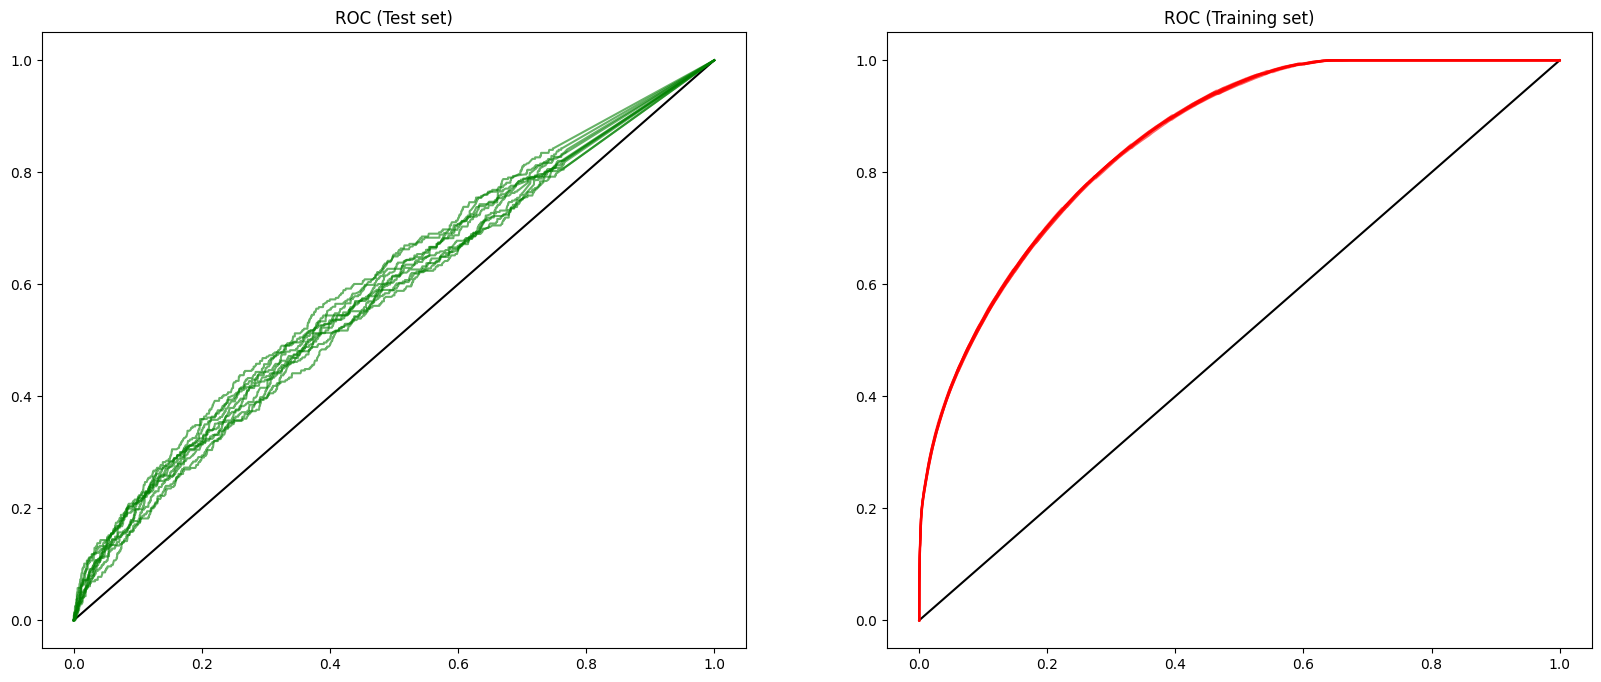

,Fold,ACC Test,ACC Training,ACC ratio,AUC Test,AUC Training,AUC ratio,CONF_MTX
0,0,85.784636,89.609916,0.957312,0.567071,0.856756,0.661882,"[[2587, 85], [348, 26]]"
1,1,85.620486,89.617207,0.955402,0.582909,0.856882,0.680268,"[[2575, 96], [342, 33]]"
2,2,86.375575,89.598979,0.964024,0.596751,0.855740,0.697351,"[[2590, 72], [343, 41]]"
3,3,87.458963,89.460445,0.977627,0.581655,0.855904,0.679580,"[[2625, 65], [317, 39]]"
4,4,85.620486,89.642727,0.955130,0.577950,0.856925,0.674446,"[[2579, 72], [366, 29]]"
5,5,86.835194,89.504192,0.970180,0.605933,0.853976,0.709543,"[[2613, 70], [331, 32]]"
6,6,85.915955,89.573460,0.959168,0.600272,0.854880,0.702171,"[[2581, 72], [357, 36]]"
7,7,84.668418,89.730222,0.943589,0.584034,0.856172,0.682145,"[[2539, 85], [382, 40]]"
8,8,86.047275,89.584397,0.960516,0.573659,0.855896,0.670244,"[[2577, 70], [355, 44]]"
9,9,85.555192,89.632790,0.954508,0.594473,0.856156,0.694351,"[[2578, 81], [360, 34]]"


In [61]:
fig = plt.figure()
fg, axes = plt.subplots(1, 2, figsize=(20, 8)) 

axes[0].set_xlim([-0.05, 1.05])
axes[0].set_ylim([-0.05, 1.05])
axes[0].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
axes[0].title.set_text("ROC (Test set)")

axes[1].set_xlim([-0.05, 1.05])
axes[1].set_ylim([-0.05, 1.05])
axes[1].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
axes[1].title.set_text("ROC (Training set)")

    
performance_stats_df = pd.DataFrame(columns=["Fold", 
                                            "ACC Test", 
                                            "ACC Training",
                                            "ACC ratio",
                                            "AUC Test",
                                            "AUC Training",
                                            "AUC ratio", 
                                            "CONF_MTX"])

for (i, data) in data_k_folds.items():
    
    print("Process fold {}".format(i))
    
    clf = RandomForestClassifier(n_estimators=50)

    ####################################################
    results_tr_tr = evaluate_classifier(clf, 
                                        data.tr_explanatory, 
                                        data.tr_explained, 
                                        data.tr_explanatory, 
                                        data.tr_explained)

    results_tr_test = evaluate_classifier(clf, 
                                            data.tr_explanatory, 
                                            data.tr_explained, 
                                            data.test_explanatory, 
                                            data.test_explained)
    ####################################################
    
    axes[0].plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = "", color="green", alpha=0.6)
    axes[1].plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = "", color="red", alpha=0.6)
    
    temp = {'Fold': i, 
            'ACC Test': results_tr_test["ACC"]*100, 
            'ACC Training': results_tr_tr["ACC"]*100, 
            'ACC ratio': results_tr_test["ACC"]/results_tr_tr["ACC"], 
            'AUC Test': results_tr_test["AUC"], 
            'AUC Training': results_tr_tr["AUC"], 
            'AUC ratio': results_tr_test["AUC"]/results_tr_tr["AUC"], 
            'CONF_MTX':results_tr_test["ConfusionMatrix"]}
    
    temp_df = pd.DataFrame([temp])  # Convert dictionary to DataFrame
    performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)

plt.show()

performance_stats_df.head(10)

In [65]:
numeric_df = performance_stats_df.select_dtypes(include=["number"])  # Keep only numeric columns
mean_values = numeric_df.mean()
print(mean_values)
#Cant print the confution matrix mean

ACC Test        85.988218
ACC Training    89.595434
ACC ratio        0.959746
AUC Test         0.586471
AUC Training     0.855929
AUC ratio        0.685198
dtype: float64


# 3. Improving the performance and select a model

[5.87502686 4.64337211 3.63551476 ... 5.50962818 3.80157943 2.61194404]


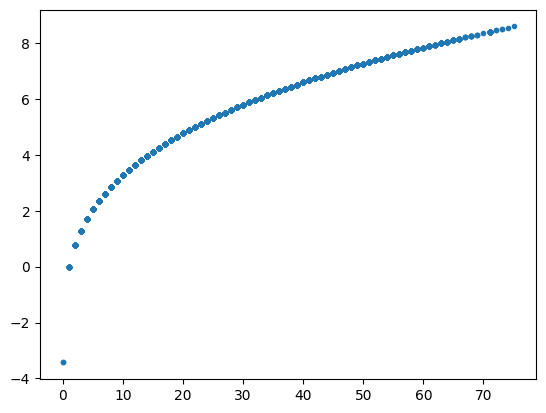

<Figure size 640x480 with 0 Axes>

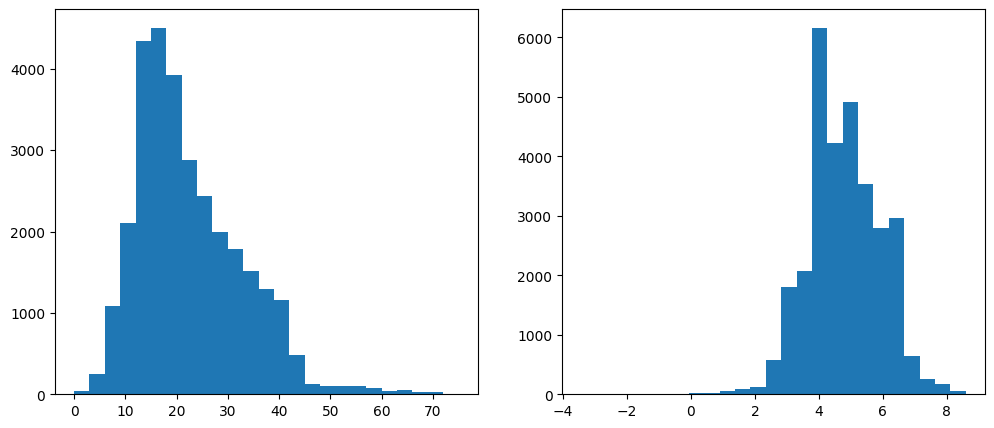

   Age  Default_Credit  Housing_Loan  Personal_Loan  Job_0  Job_1  Job_2  \
0   31               1             1              0  False  False  False   
1   19               0             0              0   True  False  False   
2   12               0             0              0  False  False  False   
3   16               0             1              0  False  False  False   
4   31               0             1              0   True  False  False   

   Job_3  Job_4  Job_5  ...  Job_9  Job_10  Marital_Status_0  \
0  False  False  False  ...   True   False             False   
1  False  False  False  ...  False   False             False   
2  False  False  False  ...  False    True             False   
3  False   True  False  ...  False   False             False   
4  False  False  False  ...  False   False             False   

   Marital_Status_1  Marital_Status_2  Education_0  Education_1  Education_2  \
0              True             False        False         True        False  

In [71]:
marketing_new_fe_df = marketingDf.copy()

# Remove the explained variable from the dataset before perfoming feature extraction/selection (transform to numerical)
EXPLAINED_VAR = marketing_new_fe_df['Subscribed']
marketing_new_fe_df.drop(columns=['Subscribed'], inplace=True)

#Dummy variables for the categorical variables: Job, Marital_Status, Education
marketing_new_fe_df = pd.get_dummies(marketing_new_fe_df, columns = ['Job'])
marketing_new_fe_df = pd.get_dummies(marketing_new_fe_df, columns = ['Marital_Status'])
marketing_new_fe_df = pd.get_dummies(marketing_new_fe_df, columns = ['Education'])

# Box-Cox transformation for Age
from scipy.stats import boxcox 

transformed = boxcox(marketing_new_fe_df['Age'] + 0.0000001)[0]
marketing_new_fe_df['AgeBoxCox'] = transformed

marketing_new_fe_df.head(5)

verbose = True
if verbose == True:
    
    print(transformed)

    plt.scatter(marketing_new_fe_df['Age'], transformed, marker=".")
    plt.show()
    
    fig = plt.figure()
    fg, axes = plt.subplots(1, 2, figsize=(12, 5)) 
    axes[0].hist(marketing_new_fe_df['Age'], bins=25)
    axes[1].hist(marketing_new_fe_df['AgeBoxCox'], bins=25)
    plt.show()
    
    print(marketing_new_fe_df.head(5))

In [72]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

_deg = 2
poly_fe_obj = PolynomialFeatures(degree=_deg).fit(marketing_new_fe_df)
polynomial_fe = poly_fe_obj.transform(marketing_new_fe_df)

polynomial_fe = pd.DataFrame(polynomial_fe)
polynomial_fe

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.0,31.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,5.875027,0.0,0.0,0.000000,0.0,0.000000,34.515941
1,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,1.0,0.0,4.643372,0.0,0.000000,21.560905
2,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,3.635515,13.216968
3,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,4.250714,18.068570
4,1.0,31.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,5.875027,0.0,0.0,0.000000,0.0,0.000000,34.515941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,5.103428,26.044982
30473,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,5.509628,30.356003
30474,1.0,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,30.356003
30475,1.0,13.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,3.801579,14.452006


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features by removing the mean and scaling to unit variance: scaled = (x - mean(x)) / sd(x)
X_poly_fe_scaled = StandardScaler().fit_transform(polynomial_fe)

pca = PCA(n_components=10)
PCs_poly_fe = pca.fit_transform(X_poly_fe_scaled)

PCs_poly_fe_df = pd.DataFrame(data = PCs_poly_fe)

PCs_poly_fe_df.head(15)

,0,1,2,3,4,5,6,7,8,9
0,4.139673,3.631046,25.018260,-7.787801,16.340339,18.627674,310.017851,30.394948,18.867934,-1.276760
1,-0.234082,-1.264882,-2.245024,-1.951910,1.896189,2.217612,0.258008,-2.541633,-1.201798,-0.811747
2,-4.210669,0.252568,-0.249847,1.927885,-0.913452,-2.307111,2.019248,0.683533,-0.877392,2.352335
3,-0.230553,5.153964,-2.137990,1.440498,4.313966,-5.181169,-0.121816,1.622482,2.460681,-3.095441
4,1.296437,2.685060,2.969652,-1.847005,1.522068,4.380502,-0.137568,-1.945325,-1.541407,-0.702522
5,5.072407,-0.917202,4.818849,2.048581,2.263437,5.387365,-1.541932,5.394489,3.700016,0.218357
6,-4.353669,3.652768,-1.601496,2.753168,0.475301,-5.593192,0.015473,2.261459,2.162838,-3.116564
7,-3.619816,-0.760907,6.890562,1.209415,-0.641488,-0.373975,-0.175966,-1.059194,-0.378262,-0.698848
8,-3.049189,-0.158531,7.869727,0.815803,-1.166210,-0.214030,-0.205765,-0.981120,-0.652108,-0.925712
9,0.783314,-4.279297,-1.203035,-4.044509,2.637797,-2.756334,-0.025191,-0.497780,-1.528249,-0.464206


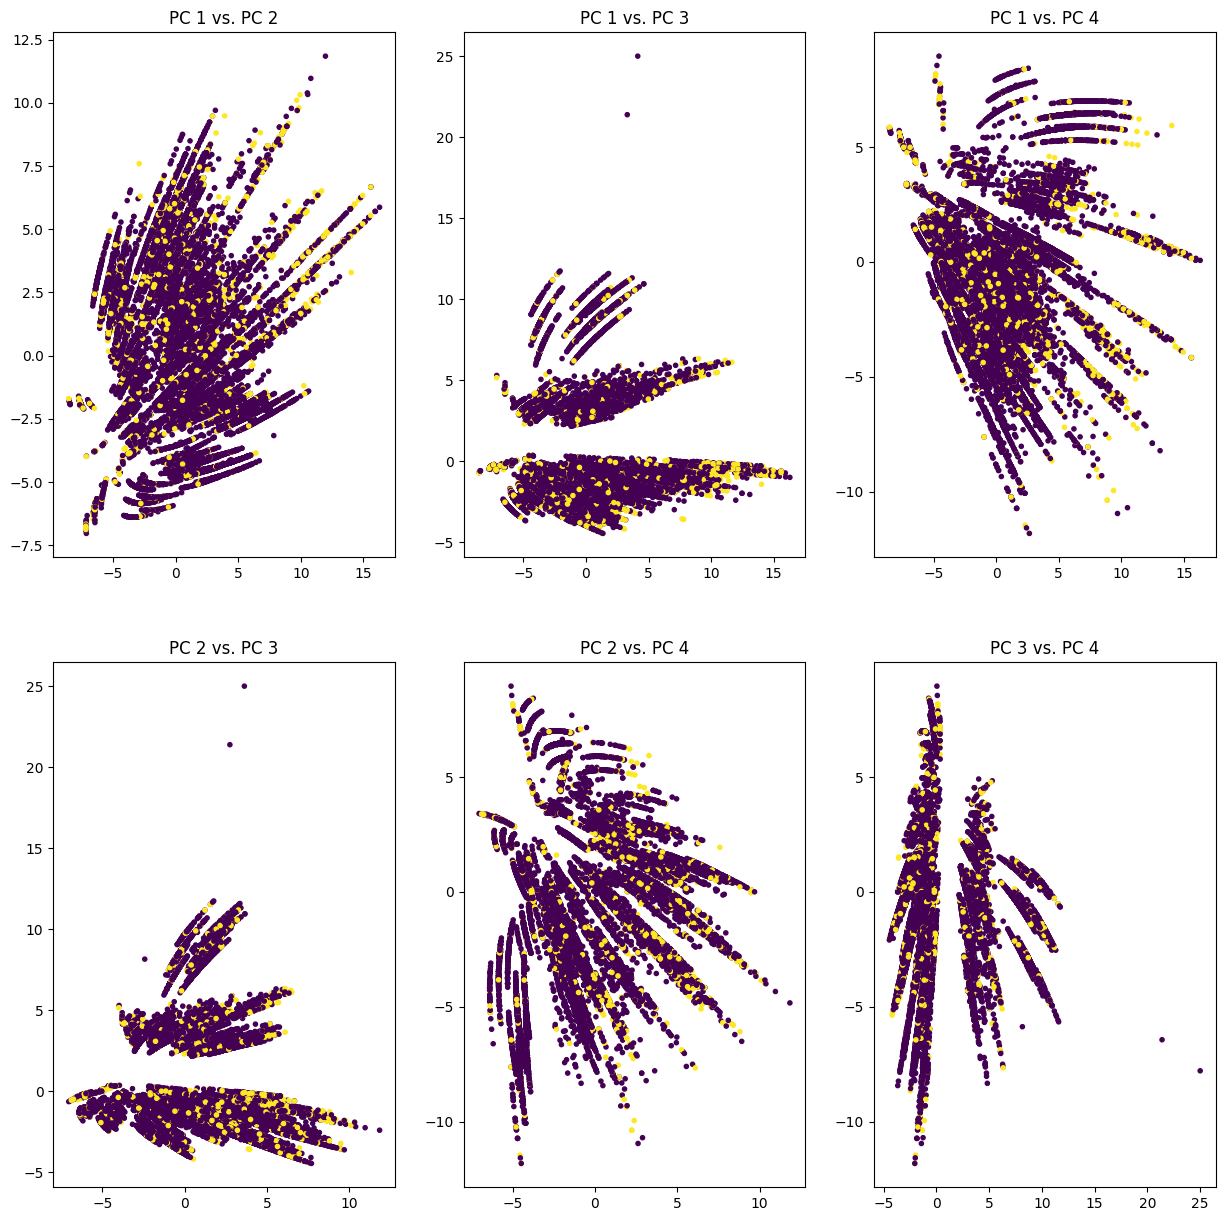

In [75]:
pc_df = PCs_poly_fe_df
pc_df['Class'] = EXPLAINED_VAR  # rmk: the class Y was not changed

fig, ax = plt.subplots(2, 3, figsize=(15,15))


ax[0][0].set_title('PC 1 vs. PC 2')
ax[0][0].scatter(pc_df[0], pc_df[1], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][1].set_title('PC 1 vs. PC 3')
ax[0][1].scatter(pc_df[0], pc_df[2], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][2].set_title('PC 1 vs. PC 4')
ax[0][2].scatter(pc_df[0], pc_df[3], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][0].set_title('PC 2 vs. PC 3')
ax[1][0].scatter(pc_df[1], pc_df[2], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][1].set_title('PC 2 vs. PC 4')
ax[1][1].scatter(pc_df[1], pc_df[3], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][2].set_title('PC 3 vs. PC 4')
ax[1][2].scatter(pc_df[2], pc_df[3], c = pc_df["Class"], cmap ='viridis', marker=".")

plt.show() 

### Cross validate the new dataset, augmented with new features

In [78]:
import numpy as np
import math 

def cross_validation(clf, dataset, k_folds=10):
    """ Encapsulate the k-fold Cross Validation procedure into this method """
    
    ### SPLIT
    data_k_folds = split_df(dataset, k_folds)

    ## PREPARE THE ROC PLOTS
    # ROC plot
    fig = plt.figure()
    fg, axes = plt.subplots(1, 2, figsize=(20, 8)) 

    axes[0].set_xlim([-0.05, 1.05])
    axes[0].set_ylim([-0.05, 1.05])
    axes[0].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[0].title.set_text("ROC (Test set)")

    axes[1].set_xlim([-0.05, 1.05])
    axes[1].set_ylim([-0.05, 1.05])
    axes[1].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[1].title.set_text("ROC (Training set)")


    performance_stats_df = pd.DataFrame(columns=["Fold", 
                                                "ACC Test", "ACC Training", "ACC ratio",
                                                "AUC Test", "AUC Training", "AUC ratio", 
                                                "CONF_MTX"])

    ## RUN THE CLASSIFIERS
    for (i, data) in data_k_folds.items():
        print("Process fold {}".format(i))

        ####################################################
        results_tr_tr = evaluate_classifier(clf, 
                                            data.tr_explanatory, 
                                            data.tr_explained, 
                                            data.tr_explanatory, 
                                            data.tr_explained)

        results_tr_test = evaluate_classifier(clf, 
                                                data.tr_explanatory, 
                                                data.tr_explained, 
                                                data.test_explanatory, 
                                                data.test_explained)
        ####################################################

        axes[0].plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = "", color="green", alpha=0.6)
        axes[1].plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = "", color="red", alpha=0.6)

        temp = {'Fold': i, 
                'ACC Test': results_tr_test["ACC"]*100, 
                'ACC Training': results_tr_tr["ACC"]*100, 
                'ACC ratio': results_tr_test["ACC"]/results_tr_tr["ACC"], 
                'AUC Test': results_tr_test["AUC"], 
                'AUC Training': results_tr_tr["AUC"], 
                'AUC ratio': results_tr_test["AUC"]/results_tr_tr["AUC"], 
                'CONF_MTX':results_tr_test["ConfusionMatrix"]}

        temp_df = pd.DataFrame([temp])  # Convert dictionary to DataFrame
        performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)

    plt.show()
    
    return performance_stats_df

Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Process fold 0


C:\Users\krist\AppData\Local\Temp\ipykernel_15604\3012717564.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)


Process fold 1
Process fold 2
Process fold 3
Process fold 4
Process fold 5
Process fold 6
Process fold 7
Process fold 8
Process fold 9


<Figure size 640x480 with 0 Axes>

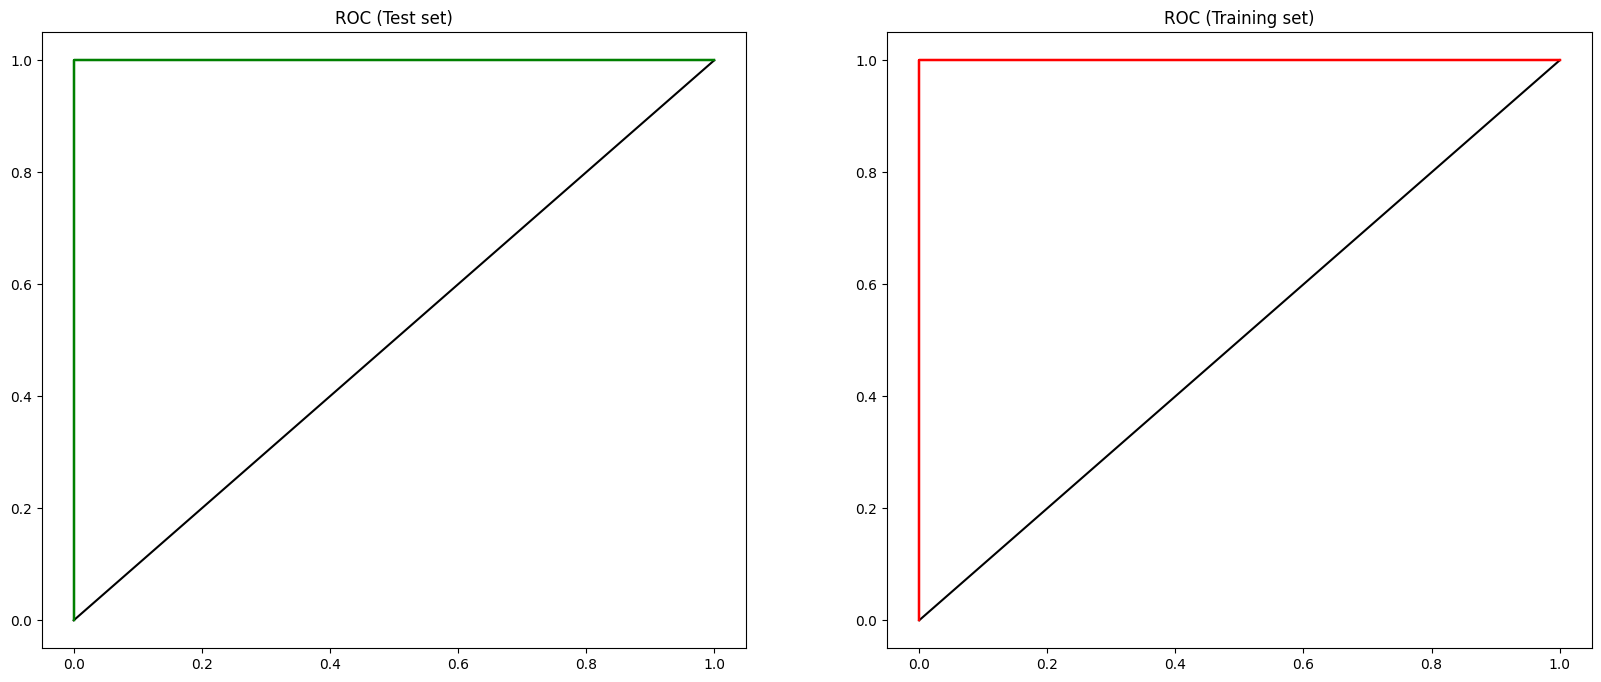

,Fold,ACC Test,ACC Training,ACC ratio,AUC Test,AUC Training,AUC ratio,CONF_MTX
0,0,100.0,100.0,1.0,1.0,1.0,1.0,"[[2668, 0], [0, 378]]"
1,1,100.0,100.0,1.0,1.0,1.0,1.0,"[[2658, 0], [0, 388]]"
2,2,100.0,100.0,1.0,1.0,1.0,1.0,"[[2672, 0], [0, 374]]"
3,3,100.0,100.0,1.0,1.0,1.0,1.0,"[[2664, 0], [0, 382]]"
4,4,100.0,100.0,1.0,1.0,1.0,1.0,"[[2664, 0], [0, 382]]"
5,5,100.0,100.0,1.0,1.0,1.0,1.0,"[[2668, 0], [0, 378]]"
6,6,100.0,100.0,1.0,1.0,1.0,1.0,"[[2648, 0], [0, 398]]"
7,7,100.0,100.0,1.0,1.0,1.0,1.0,"[[2663, 0], [0, 383]]"
8,8,100.0,100.0,1.0,1.0,1.0,1.0,"[[2654, 0], [0, 392]]"
9,9,100.0,100.0,1.0,1.0,1.0,1.0,"[[2653, 0], [0, 400]]"


In [80]:
kfolds = 10

dataset = polynomial_fe
dataset = pd.DataFrame(X_poly_fe_scaled)
dataset = PCs_poly_fe_df

dataset['Last_Column'] = EXPLAINED_VAR

dataset.columns = dataset.columns.astype(str)

performance_stats_df = cross_validation(RandomForestClassifier(n_estimators=50), dataset, k_folds=kfolds)

performance_stats_df.head(kfolds) 

In [82]:
numeric_df = performance_stats_df.select_dtypes(include=["number"])  # Keep only numeric columns
mean_values = numeric_df.mean()
print(mean_values)
#Cant print the confution matrix mean

ACC Test        100.0
ACC Training    100.0
ACC ratio         1.0
AUC Test          1.0
AUC Training      1.0
AUC ratio         1.0
dtype: float64


In [83]:
import numpy as np
import math 
    

def cross_validation2(clf, dataset, k_folds=10, oversampling=False, use_scaling=True, use_pca=True, pca_n_components=5):
    """ Encapsulate the k-fold Cross Validation procedure into this method """
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
        
    ### SPLIT
    data_k_folds = split_df(dataset, k_folds)

    ## PREPARE THE ROC PLOTS
    # ROC plot
    fig = plt.figure()
    fg, axes = plt.subplots(1, 2, figsize=(20, 8)) 

    axes[0].set_xlim([-0.05, 1.05])
    axes[0].set_ylim([-0.05, 1.05])
    axes[0].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[0].title.set_text("ROC (Test set)")

    axes[1].set_xlim([-0.05, 1.05])
    axes[1].set_ylim([-0.05, 1.05])
    axes[1].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[1].title.set_text("ROC (Training set)")


    performance_stats_df = pd.DataFrame(columns=["Fold", 
                                                "ACC Test", "ACC Training", "ACC ratio",
                                                "AUC Test", "AUC Training", "AUC ratio", 
                                                "CONF_MTX"])

    ## RUN THE CLASSIFIERS
    for (i, data) in data_k_folds.items():
        print("Process fold {}".format(i))
        
        ####################################################
        
        if use_scaling:
            # Standardize features by removing the mean and scaling to unit variance: scaled = (x - mean(x)) / sd(x)
            scaler = StandardScaler()
            scaler.fit(data.tr_explanatory)
            data.tr_explanatory = scaler.transform(data.tr_explanatory)
            data.test_explanatory = scaler.transform(data.test_explanatory)
        
        if use_pca:
            pca = PCA(pca_n_components)
            pca.fit(data.tr_explanatory)
            
            data.tr_explanatory = pca.transform(data.tr_explanatory)
            data.test_explanatory = pca.transform(data.test_explanatory)

        ####################################################
        
        
        ####################################################
        if oversampling:
            ### Oversampling: hardcoded! 
            tr_data_temp = pd.DataFrame(data.tr_explanatory)
            tr_data_temp['Last_Column'] = data.tr_explained

            only_class_1 = tr_data_temp[tr_data_temp['Last_Column']==1]

            temp = pd.concat([only_class_1, only_class_1, only_class_1, 
                              only_class_1, only_class_1, only_class_1, 
                              only_class_1])

            dataset_balanced = pd.concat([tr_data_temp[tr_data_temp['Last_Column']==0], temp])
            dataset_balanced = dataset_balanced.sample(frac=1).reset_index(drop=True) # Randomize rows

            data.tr_explained = dataset_balanced['Last_Column']
            data.tr_explanatory = dataset_balanced.drop(columns=['Last_Column'])
        ####################################################


        ####################################################
        results_tr_tr = evaluate_classifier(clf, 
                                            data.tr_explanatory, 
                                            data.tr_explained, 
                                            data.tr_explanatory, 
                                            data.tr_explained)

        results_tr_test = evaluate_classifier(clf, 
                                                data.tr_explanatory, 
                                                data.tr_explained, 
                                                data.test_explanatory, 
                                                data.test_explained)
        ####################################################

        axes[0].plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = "", color="green", alpha=0.6)
        axes[1].plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = "", color="red", alpha=0.6)

        temp = {'Fold': i, 
                'ACC Test': results_tr_test["ACC"]*100, 
                'ACC Training': results_tr_tr["ACC"]*100, 
                'ACC ratio': results_tr_test["ACC"]/results_tr_tr["ACC"], 
                'AUC Test': results_tr_test["AUC"], 
                'AUC Training': results_tr_tr["AUC"], 
                'AUC ratio': results_tr_test["AUC"]/results_tr_tr["AUC"], 
                'CONF_MTX':results_tr_test["ConfusionMatrix"]}

        temp_df = pd.DataFrame([temp])  # Convert dictionary to DataFrame
        performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)

    plt.show()
    
    return performance_stats_df

Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Process fold 0


C:\Users\krist\AppData\Local\Temp\ipykernel_15604\3270827102.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)


Process fold 1
Process fold 2
Process fold 3
Process fold 4
Process fold 5
Process fold 6
Process fold 7
Process fold 8
Process fold 9


<Figure size 640x480 with 0 Axes>

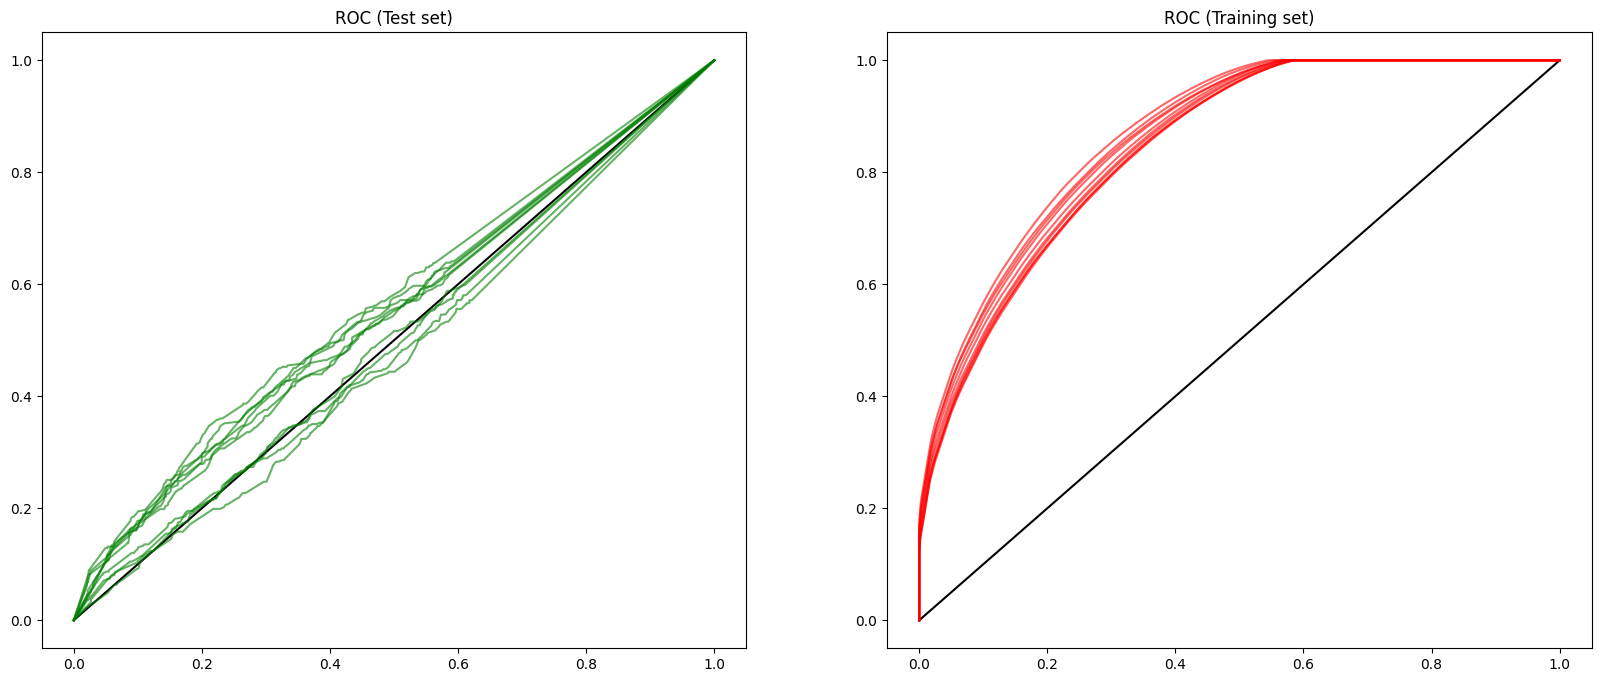

,Fold,ACC Test,ACC Training,ACC ratio,AUC Test,AUC Training,AUC ratio,CONF_MTX
0,0,58.174655,74.830979,0.777414,0.473409,0.842942,0.561616,"[[1636, 1018], [256, 136]]"
1,1,59.192383,74.888826,0.790403,0.501643,0.844182,0.594236,"[[1645, 981], [262, 158]]"
2,2,58.108995,75.098475,0.773771,0.489864,0.844955,0.579751,"[[1640, 1058], [218, 130]]"
3,3,57.649376,75.317016,0.765423,0.498163,0.848197,0.587319,"[[1617, 1038], [252, 139]]"
4,4,60.669731,75.538648,0.803161,0.540083,0.850761,0.634823,"[[1682, 986], [212, 166]]"
5,5,61.621799,75.954269,0.811301,0.547019,0.855508,0.639409,"[[1723, 969], [200, 154]]"
6,6,62.705187,76.474709,0.819947,0.554767,0.861237,0.644152,"[[1731, 911], [225, 179]]"
7,7,63.854235,77.025325,0.829003,0.547409,0.867225,0.631219,"[[1777, 875], [226, 168]]"
8,8,65.101773,77.717138,0.837676,0.566605,0.873678,0.648528,"[[1819, 832], [231, 164]]"
9,9,63.969866,76.766296,0.833307,0.562085,0.864074,0.650505,"[[1780, 893], [207, 173]]"


In [84]:
dt = tree.DecisionTreeClassifier()

kfolds = 10

dataset = polynomial_fe
dataset['Last_Column'] = EXPLAINED_VAR

performance_stats_df2 = cross_validation2(dt, 
                                          dataset, 
                                          k_folds=kfolds, 
                                          oversampling = True, 
                                          use_scaling=True, 
                                          use_pca=True, 
                                          pca_n_components=10)

performance_stats_df2.head(kfolds) 

In [86]:
numeric_df2 = performance_stats_df2.select_dtypes(include=["number"])  # Keep only numeric columns
mean_values = numeric_df2.mean()
print(mean_values)

ACC Test        61.104800
ACC Training    75.961168
ACC ratio        0.804141
AUC Test         0.528105
AUC Training     0.855276
AUC ratio        0.617156
dtype: float64


Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Process fold 0


C:\Users\krist\AppData\Local\Temp\ipykernel_15604\3270827102.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)


Process fold 1
Process fold 2
Process fold 3
Process fold 4
Process fold 5
Process fold 6
Process fold 7
Process fold 8
Process fold 9


<Figure size 640x480 with 0 Axes>

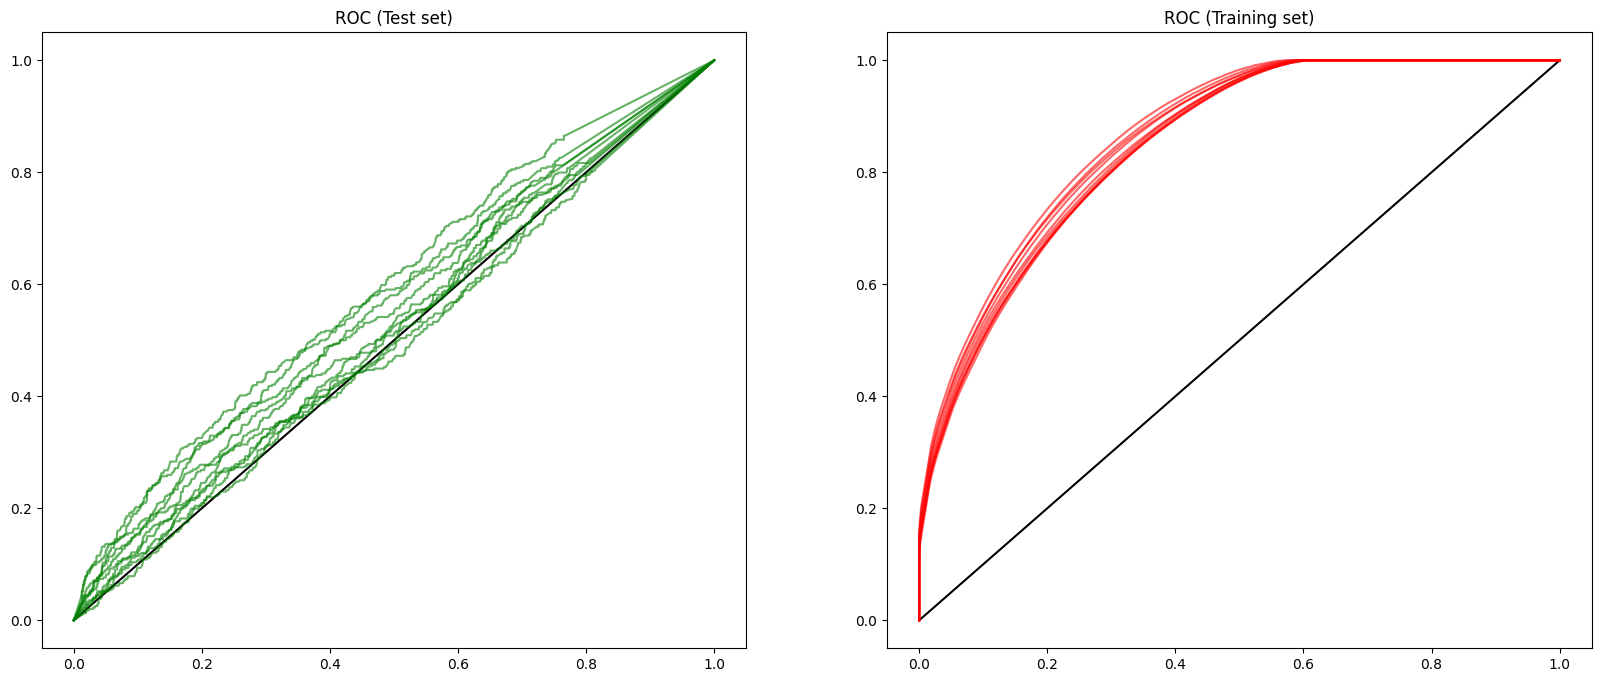

,Fold,ACC Test,ACC Training,ACC ratio,AUC Test,AUC Training,AUC ratio,CONF_MTX
0,0,60.242942,75.142991,0.801711,0.493603,0.844889,0.584223,"[[1682, 968], [243, 153]]"
1,1,59.684833,75.049296,0.795275,0.510520,0.846143,0.603349,"[[1662, 978], [250, 156]]"
2,2,60.702561,75.113546,0.808144,0.504523,0.846633,0.595917,"[[1705, 954], [243, 144]]"
3,3,60.669731,75.329132,0.805395,0.511573,0.848370,0.603007,"[[1714, 966], [232, 134]]"
4,4,58.995404,75.557421,0.780802,0.530919,0.851042,0.623846,"[[1647, 1039], [210, 150]]"
5,5,62.902167,75.782237,0.830038,0.533721,0.853559,0.625288,"[[1763, 904], [226, 153]]"
6,6,63.197636,76.404100,0.827150,0.552363,0.859430,0.642708,"[[1768, 894], [227, 157]]"
7,7,63.131976,76.972546,0.820188,0.570045,0.864525,0.659373,"[[1764, 903], [220, 159]]"
8,8,64.116875,77.527485,0.827021,0.579859,0.871100,0.665663,"[[1776, 889], [204, 177]]"
9,9,63.675074,76.697252,0.830213,0.591754,0.863019,0.685678,"[[1758, 879], [230, 186]]"


In [87]:
kfolds = 10

dataset = polynomial_fe
dataset['Last_Column'] = EXPLAINED_VAR


performance_stats_df2 = cross_validation2(RandomForestClassifier(n_estimators=50), 
                                          dataset, 
                                          k_folds=kfolds, 
                                          oversampling = True, 
                                          use_scaling=True, 
                                          use_pca=True, 
                                          pca_n_components=10)

performance_stats_df2.head(kfolds) 
numeric_df2 = performance_stats_df2.select_dtypes(include=["number"])  # Keep only numeric columns
mean_values = numeric_df2.mean()
print(mean_values)

Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Process fold 0


C:\Users\krist\AppData\Local\Temp\ipykernel_15604\3270827102.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)


Process fold 1
Process fold 2
Process fold 3
Process fold 4
Process fold 5
Process fold 6
Process fold 7
Process fold 8
Process fold 9


<Figure size 640x480 with 0 Axes>

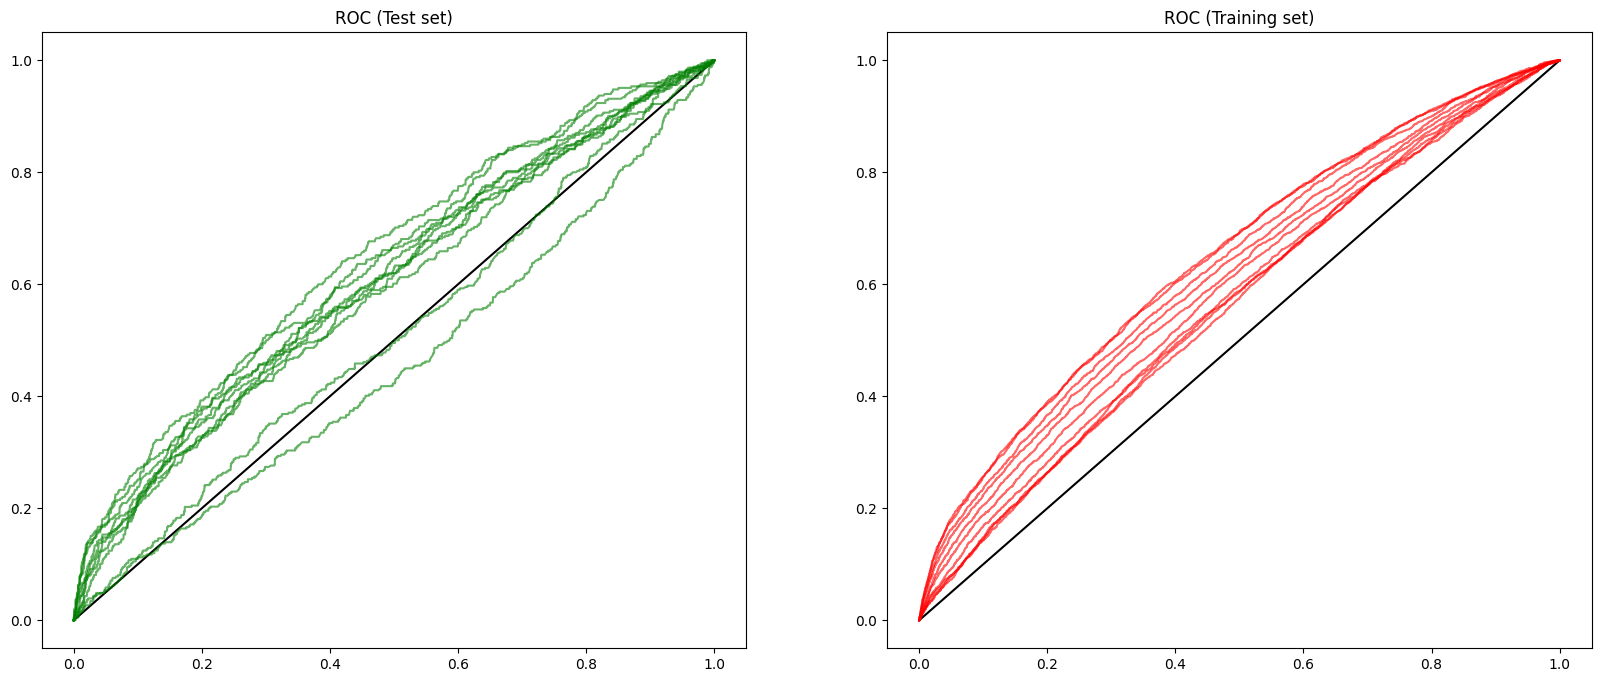

ACC Test        57.973674
ACC Training    56.868479
ACC ratio        1.018651
AUC Test         0.586911
AUC Training     0.600347
AUC ratio        0.977365
dtype: float64


In [89]:
kfolds = 10

dataset = polynomial_fe
dataset['Last_Column'] = EXPLAINED_VAR


performance_stats_df2 = cross_validation2(LogisticRegression(max_iter=5000), 
                                          dataset, 
                                          k_folds=kfolds, 
                                          oversampling = True, 
                                          use_scaling=True, 
                                          use_pca=False, 
                                          pca_n_components=10)

performance_stats_df2.head(kfolds) 

numeric_df2 = performance_stats_df2.select_dtypes(include=["number"])  # Keep only numeric columns
mean_values = numeric_df2.mean()
print(mean_values)

Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Consistent dimensions.
Process fold 0


C:\Users\krist\AppData\Local\Temp\ipykernel_15604\3270827102.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_stats_df = pd.concat([performance_stats_df, temp_df], ignore_index=True)


Process fold 1
Process fold 2
Process fold 3
Process fold 4
Process fold 5
Process fold 6
Process fold 7
Process fold 8
Process fold 9


<Figure size 640x480 with 0 Axes>

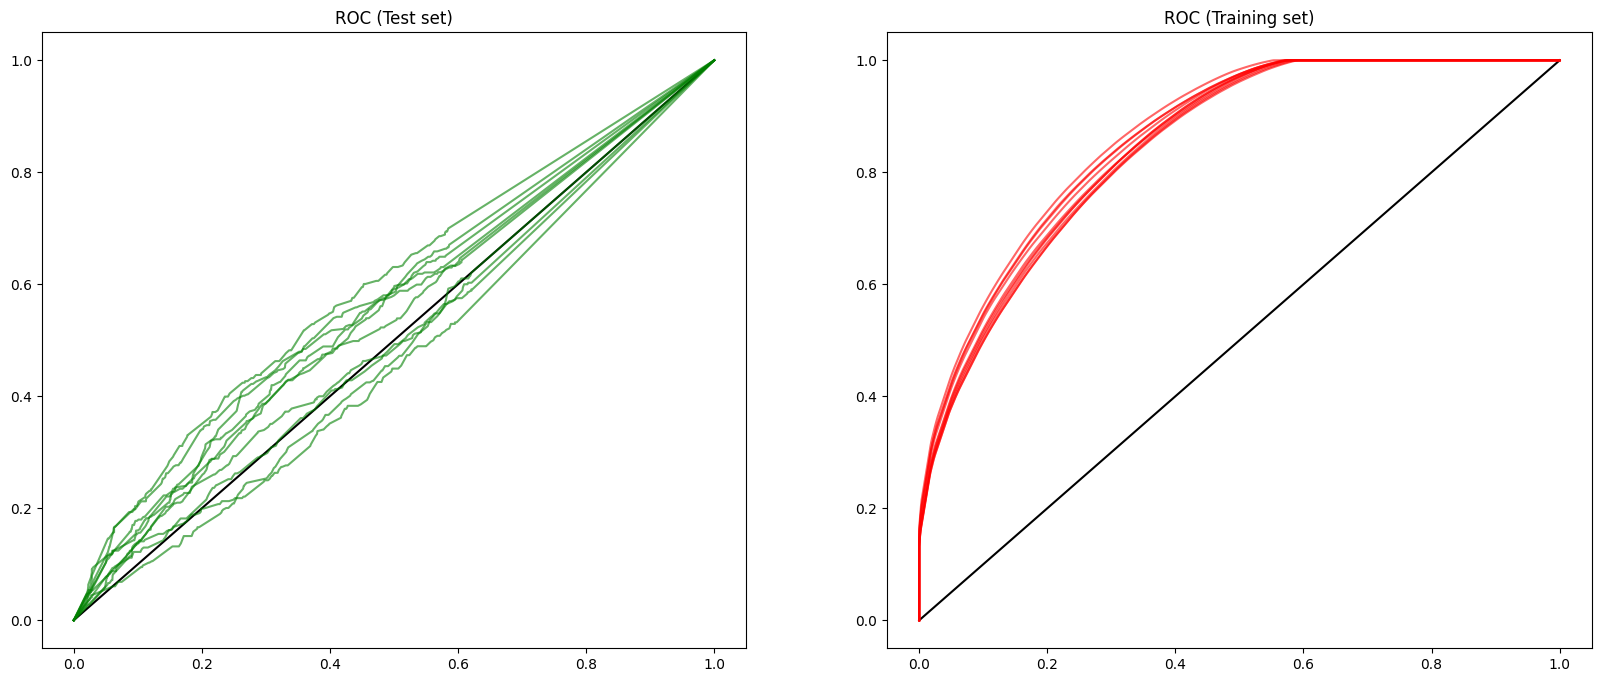

ACC Test        60.901209
ACC Training    75.866447
ACC ratio        0.802519
AUC Test         0.535749
AUC Training     0.854865
AUC ratio        0.626415
dtype: float64


In [90]:
from sklearn.neural_network import MLPClassifier

nnet = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 25, 2), random_state=1)
dt = tree.DecisionTreeClassifier()

kfolds = 10

dataset = polynomial_fe
dataset['Last_Column'] = EXPLAINED_VAR

performance_stats_df2 = cross_validation2(dt, 
                                          dataset, 
                                          k_folds=kfolds, 
                                          oversampling = True, 
                                          use_scaling=True, 
                                          use_pca=False, 
                                          pca_n_components=5)

performance_stats_df2.head(kfolds) 

numeric_df2 = performance_stats_df2.select_dtypes(include=["number"])  # Keep only numeric columns
mean_values = numeric_df2.mean()
print(mean_values)